In [1]:
using DataFrames

In [2]:
using Interact

In [3]:
using Distributions

In [4]:
using PyPlot

INFO: Loading help data...


In [198]:
raw = readtable("c:\\Users\\anita\\elevation.csv");

In [51]:
type ThreeD
    xgrid::Array{Float64,2}
    ygrid::Array{Float64,2}
    zgrid::Array{Float64,2}
end    

In [52]:
function makeGrid(chart)
    # We right now only support square grids.
    dim = int(sqrt(size(chart)[1]))
    xgrid = zeros(dim, dim)
    ygrid = zeros(dim, dim)
    zgrid = zeros(dim, dim)
    for i in 1:dim
        for j in 1:dim
            k = (i - 1) * dim + j
            xgrid[i:i, j:j] = raw[k:k, :x]
            ygrid[i:i, j:j] = raw[k:k, :y]
            zgrid[i:i, j:j] = raw[k:k, :z]
        end
    end     
    return ThreeD(xgrid, ygrid, zgrid)
end

makeGrid (generic function with 1 method)

In [55]:
threed=makeGrid(raw);

In [79]:
plot3d = function (data::ThreeD) 
    plot_wireframe(data.xgrid, data.ygrid, data.zgrid)
end

(anonymous function)

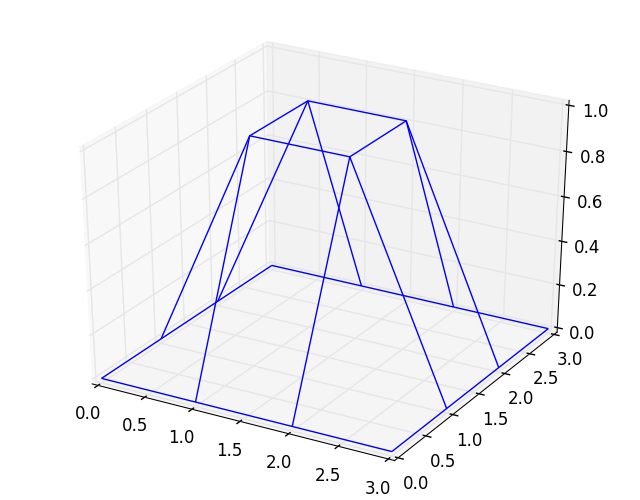

PyObject <mpl_toolkits.mplot3d.art3d.Line3DCollection object at 0x000000003A3F3E80>

In [80]:
plot3d(threed)

In [199]:
function divide(xg::Array{Float64,2})
    dimi = size(xg)[1]*2 -1
    dimj = size(xg)[2]*2 -1
    xgrid2 = zeros(dimi, dimj)    
    for i in 1:dimi
        for j in 1:dimj
            if (i % 2 == 1 && j % 2 == 1)
                l = int((i+1)/2)
                m = int((j+1)/2)
                val = xg[l,m]
                xgrid2[i,j] = val
            end
            if (i % 2 == 0 && j % 2 == 1)
                l1 = int(i/2)
                l2 = l1 + 1
                m = int((j+1)/2)
                val1 = xg[l1,m]
                val2 = xg[l2,m]
                xgrid2[i,j] = (val1 + val2)/2
            end
            if (i % 2 == 1 && j % 2 == 0)
                l = int((i+1)/2)
                m1 = int(j/2)
                m2 = m1 + 1
                val1 = xg[l,m1]
                val2 = xg[l,m2]
                xgrid2[i,j] = (val1 + val2)/2
            end
            if (i % 2 == 0 && j % 2 == 0)
                l1 = int(i/2)
                l2 = l1 + 1
                m1 = int(j/2)
                m2 = m1 + 1
                val1 =xg[l1, m1]
                val2 = xg[l1, m2]
                val3 = xg[l2, m1]
                val4 = xg[l2, m2]
                val = (val1 + val2 + val3 + val4)/4
                xgrid2[i, j] = val
            end
        end
    end
    return xgrid2
end

divide (generic function with 1 method)

In [171]:
function divide3d(threed::ThreeD) 
    xgrid2 = divide(threed.xgrid)
    ygrid2 = divide(threed.ygrid)
    zgrid2 = divide(threed.zgrid)
    return ThreeD(xgrid2, ygrid2, zgrid2)
end

divide3d (generic function with 1 method)

In [190]:
function avg3d(grid::Array{Float64,2}, i::Int, j::Int)
    dim1 = size(grid)[1]
    dim2 = size(grid)[2]
    avg = 0
    if (i > 1 && i < dim1 && j > 1 && j < dim2)
        # Happy case.
        # 8 neighbours,
        n = 4
        w = n^2 - 3n
        avg = w * grid[i, j]
        avg += 2*grid[i-1, j]
        avg += 2*grid[i+1, j]
        avg += 2*grid[i, j-1]
        avg += 2*grid[i, j+1]
        
        avg += grid[i-1, j-1]
        avg += grid[i-1, j+1]
        avg += grid[i+1, j-1]
        avg += grid[i+1, j+1]
        
        avg = (avg)/(n^2)
    else
        avg = grid[i, j]
    end
    return avg
end

function move3d(input::ThreeD)
    dim = size(input.xgrid)[1]
    xgrid2 = zeros(dim, dim)
    ygrid2 = zeros(dim, dim)
    zgrid2 = zeros(dim, dim)
    for i in 1:dim
        for j in 1:dim
            xgrid2[i, j] = avg3d(input.xgrid, i, j)
            ygrid2[i, j] = avg3d(input.ygrid, i, j)
            zgrid2[i, j] = avg3d(input.zgrid, i, j)
        end
    end
    return ThreeD(xgrid2, ygrid2, zgrid2)            
end
        
function smooth3d(threed::ThreeD)
    return move3d(divide3d(threed))
end
       

smooth3d (generic function with 1 method)

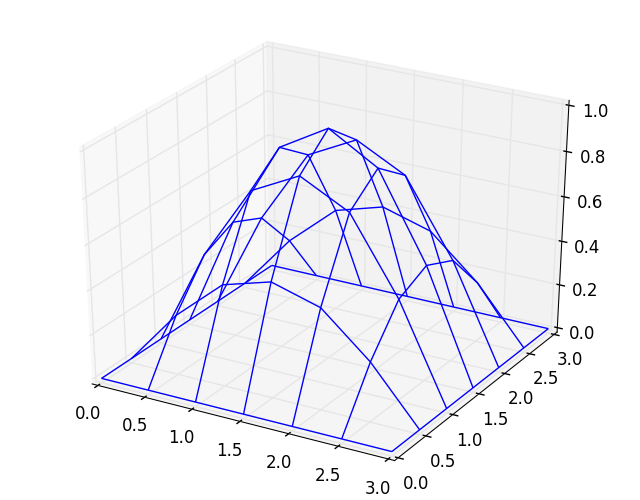

PyObject <mpl_toolkits.mplot3d.art3d.Line3DCollection object at 0x000000003E7B1DA0>

In [194]:
plot3d(smooth3d(threed))

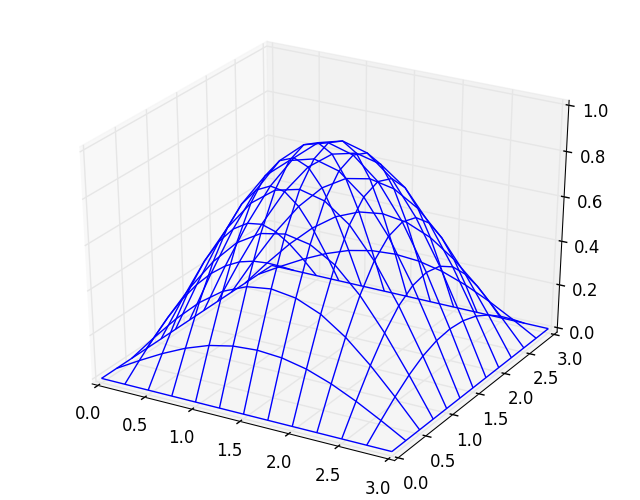

PyObject <mpl_toolkits.mplot3d.art3d.Line3DCollection object at 0x000000003E946D30>

In [195]:
plot3d(smooth3d(smooth3d(threed)))

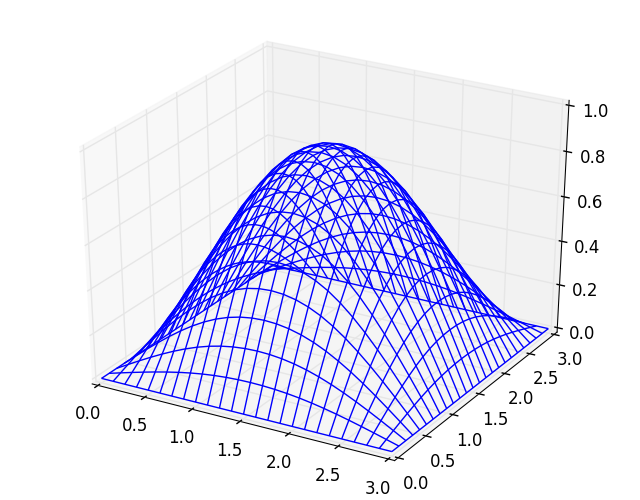

PyObject <mpl_toolkits.mplot3d.art3d.Line3DCollection object at 0x000000003EE37390>

In [200]:
plot3d(smooth3d(smooth3d((smooth3d(threed)))))